Columns in the dataset: Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')
Missing values per column before processing:
 Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64
Categorical columns detected: Index(['Transaction date'], dtype='object')
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 300}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for Gradient Boosting: {'max_depth': 10, 'n_estimators': 100}

Random Forest Results:
RMSE: 11.294624297471666
MAE: 9.541117386120428
R²: 0.53886

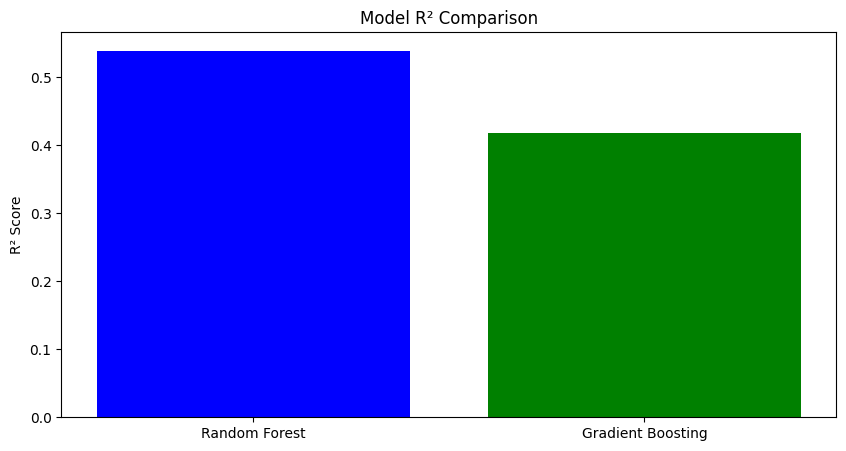

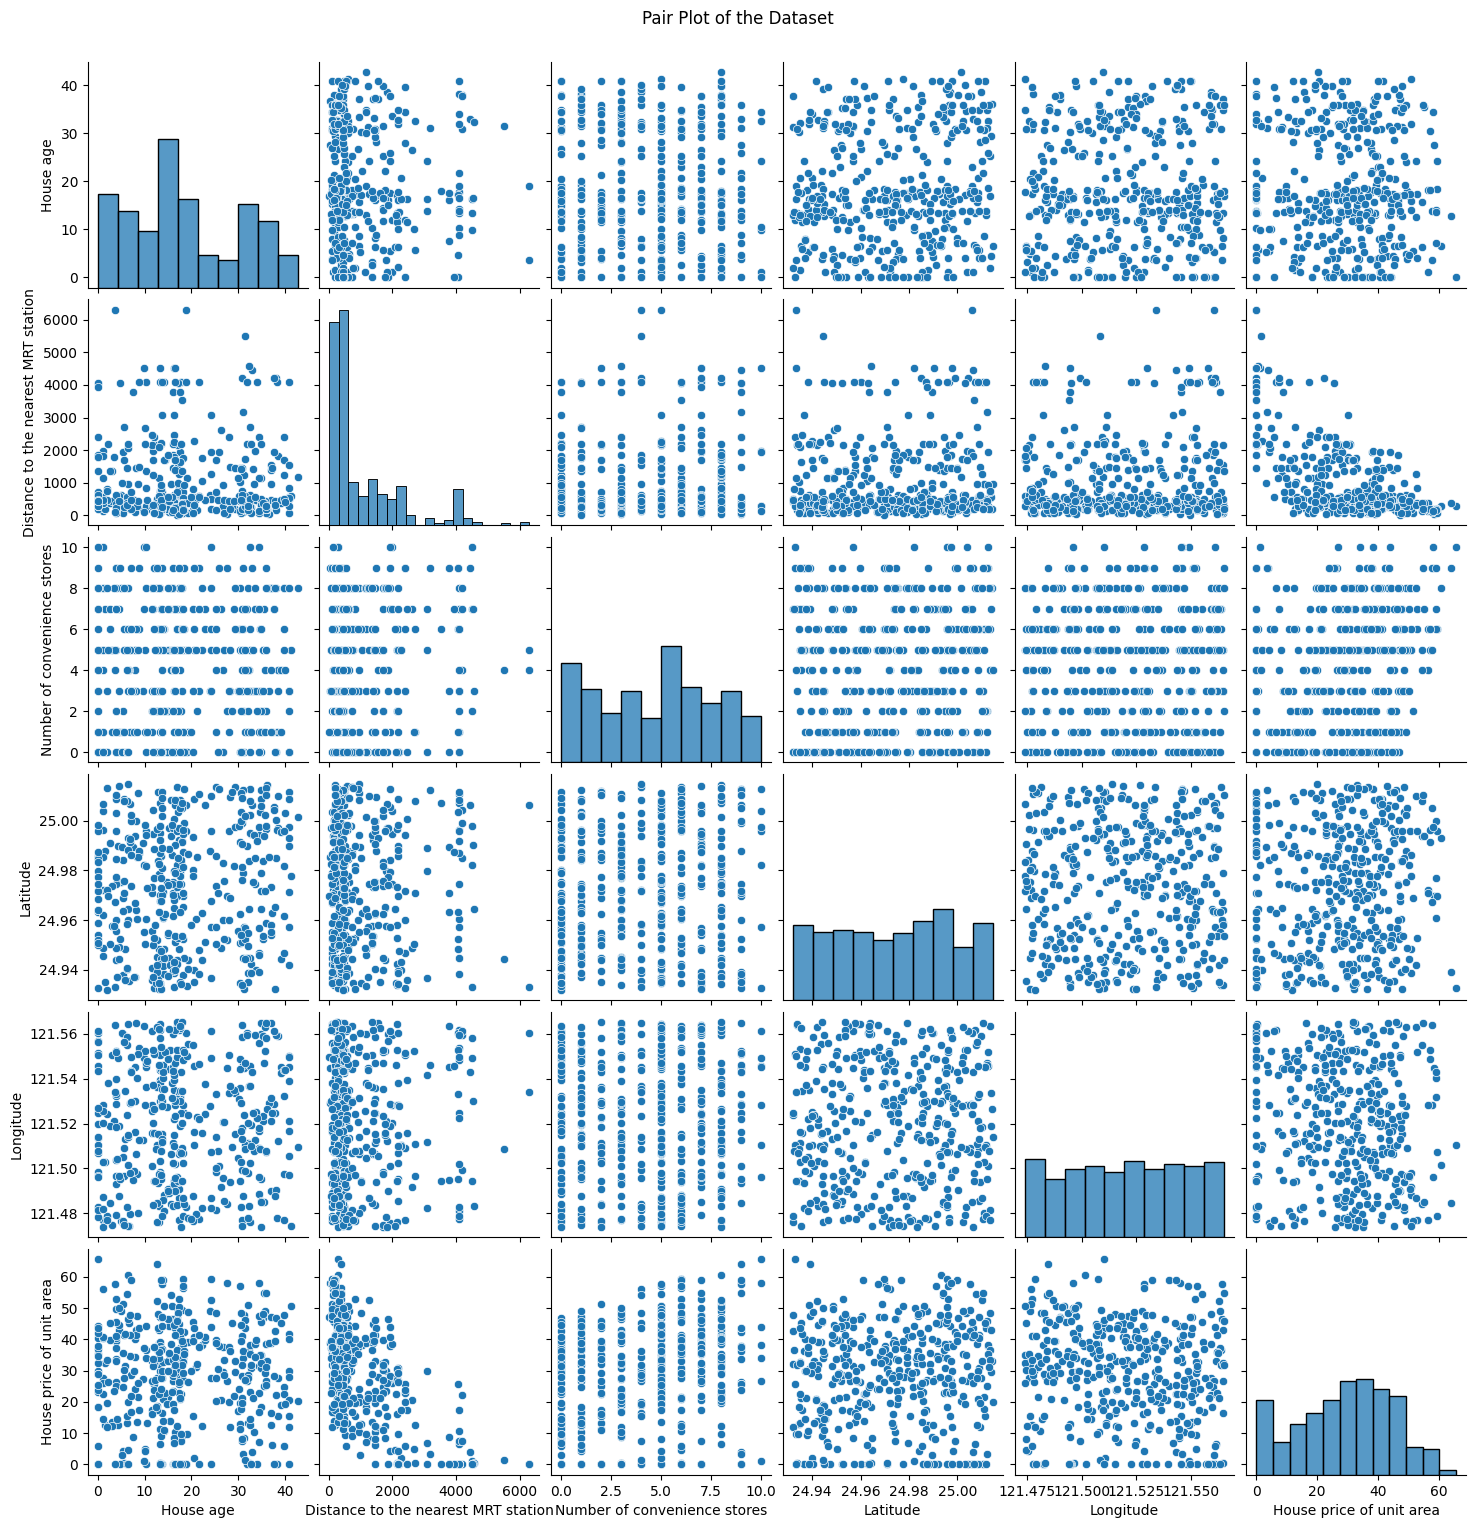

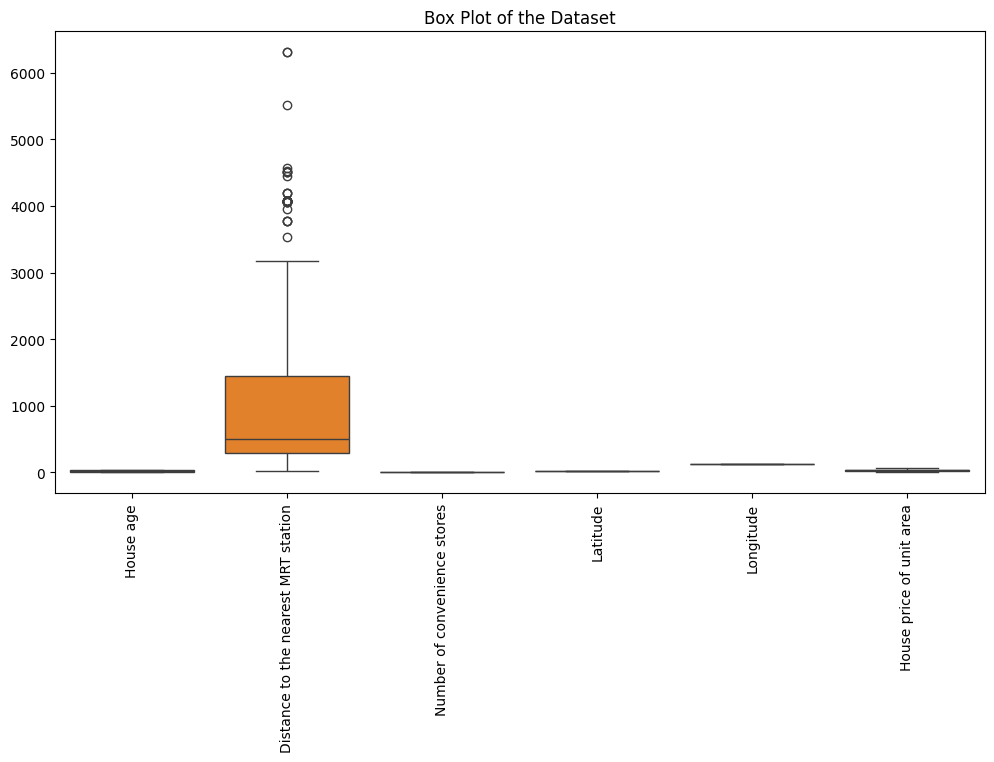

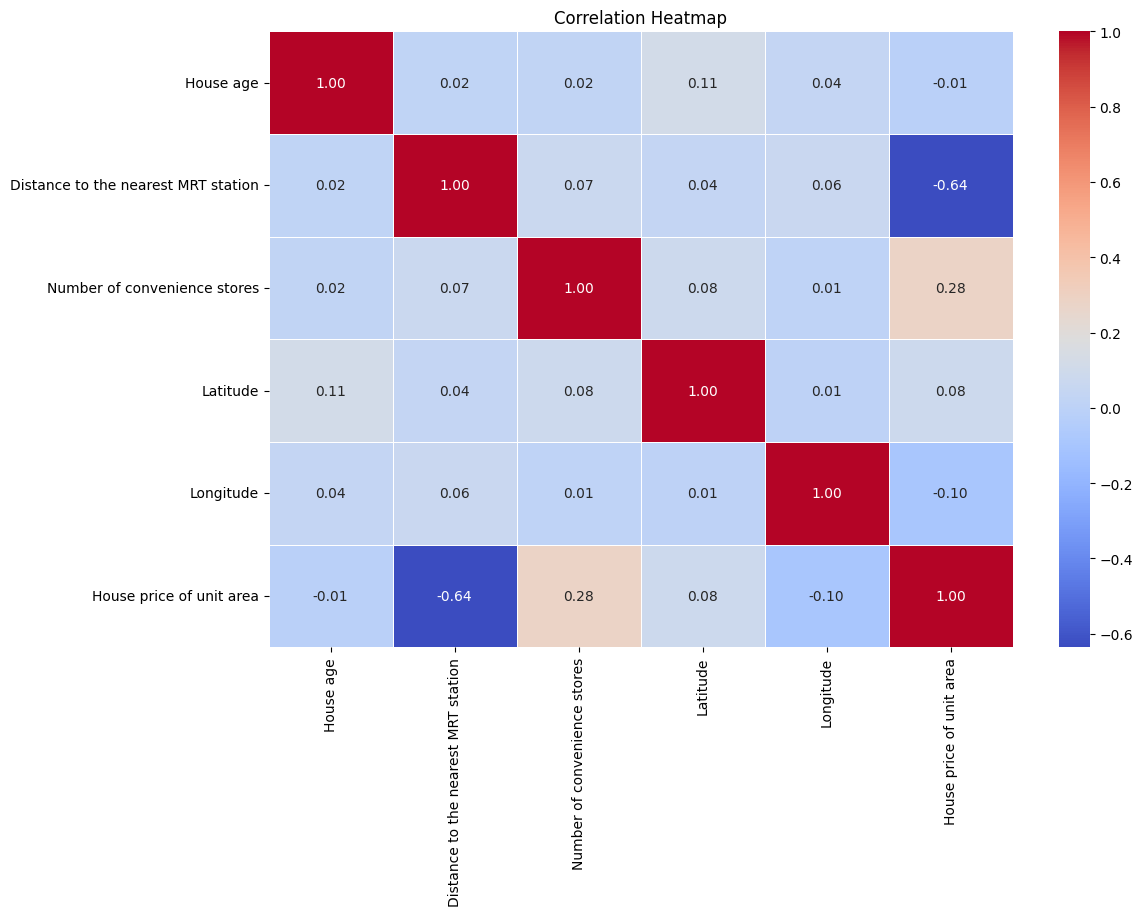

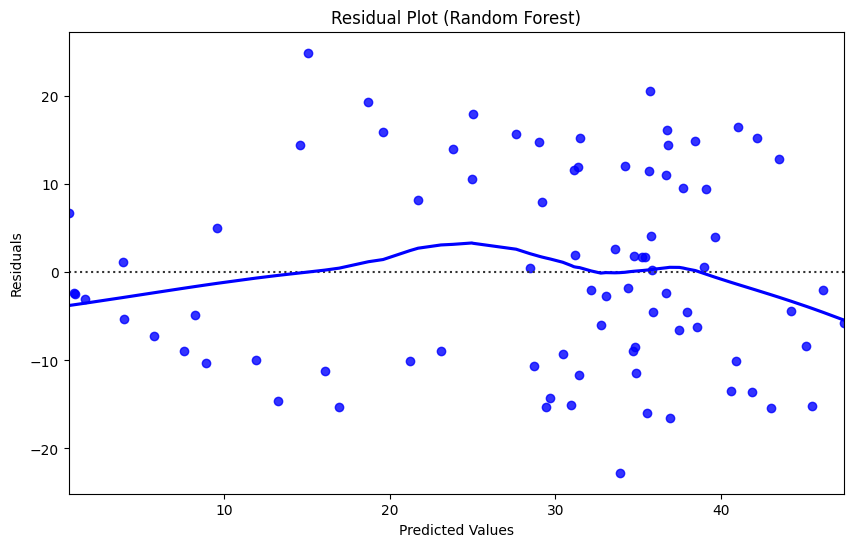


Models saved as 'rf_model.pkl' and 'gb_model.pkl'


In [ ]:
# Advanced Real Estate Valuation With Ensemble Regression Models
# Accurate Property Assessment Techniques

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Step 2: Load Dataset
data_path = '/content/Real_Estate.csv'  # Adjust this path if necessary
data = pd.read_csv(data_path)

# Display dataset columns to verify the correct names
print("Columns in the dataset:", data.columns)

# Step 3: Define Target and Features
target_column = 'House price of unit area'  # Adjusted the column name

# Check if the target column exists in the dataset
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Please verify the column names.")

# Separate features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Step 4: Data Preprocessing
# Check for missing values
print("Missing values per column before processing:\n", data.isnull().sum())
data = data.dropna()  # Drop missing values (customize as needed)

# Convert categorical variables to dummy/indicator variables
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Categorical columns detected: {categorical_cols}")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Hyperparameter Tuning with GridSearchCV (Optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
rf_model = grid_search_rf.best_estimator_

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
gb_model = grid_search_gb.best_estimator_

# Step 7: Model Evaluation
# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Results:")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R²: {rf_r2}")

# Evaluate Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("\nGradient Boosting Results:")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}")
print(f"R²: {gb_r2}")

# Step 8: Visualize Model Performance
# Model Comparison Plot
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest', 'Gradient Boosting'], [rf_r2, gb_r2], color=['blue', 'green'])
plt.title('Model R² Comparison')
plt.ylabel('R² Score')
plt.show()

# Step 9: Additional Visualizations
# Pair Plot (to visualize pairwise relationships between features)
sns.pairplot(data)
plt.suptitle("Pair Plot of the Dataset", y=1.02)
plt.show()

# Box Plot (to check the distribution and detect outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Box Plot of the Dataset")
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap (to show correlation between numerical features)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Residual Plot (to check residuals for regression models)
residuals_rf = y_test - rf_predictions
plt.figure(figsize=(10, 6))
sns.residplot(x=rf_predictions, y=residuals_rf, lowess=True, color="blue")
plt.title("Residual Plot (Random Forest)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Step 10: Save Models
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gb_model, 'gb_model.pkl')

print("\nModels saved as 'rf_model.pkl' and 'gb_model.pkl'")
